# Counting Circles, Ellipses and Finding Waldo with Template Matching

In [ ]:
# imports
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imshow(title = "", image = None, size = 10):
  h,w = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize=(aspect_ratio * size, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.title(title)
  plt.show()

# download & unzip images
!wget https://moderncomputervision.s3.eu-west-2.amazonaws.com/images.zip
!unzip -qq images.zip

### Counting circular blobs

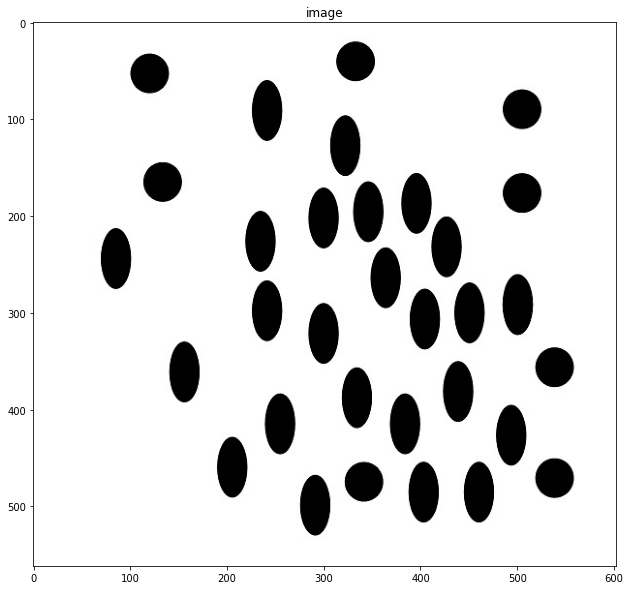

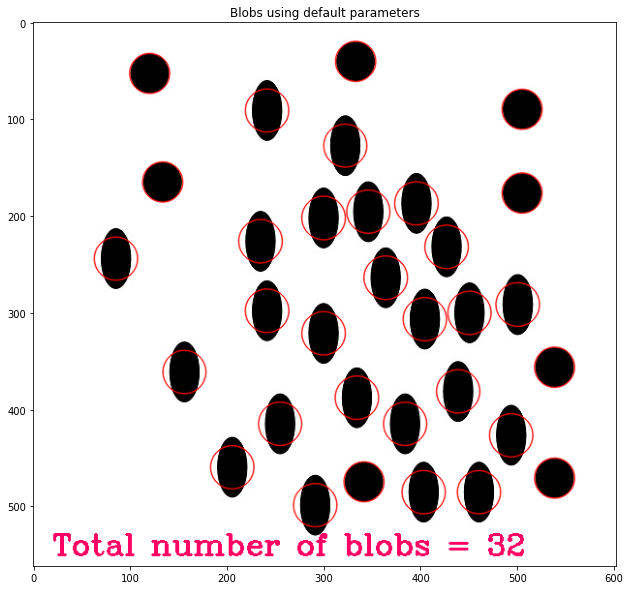

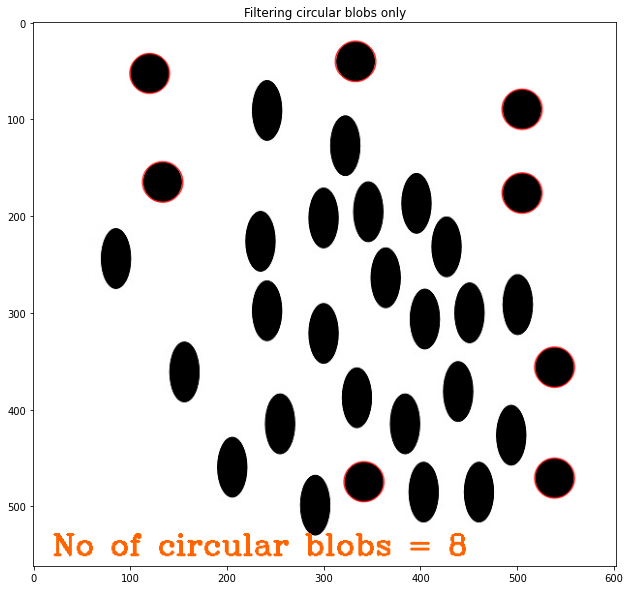

In [6]:
image = cv2.imread("/content/images/blobs.jpg")
imshow("image", image)

# initialize the detector using default parameters
detector = cv2.SimpleBlobDetector_create()

# Detect blobs
keypoints = detector.detect(image)

# Draw blobs on our image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# number of blobs
no_blobs = len(keypoints)
text = "Total number of blobs = "+str(no_blobs)
cv2.putText(blobs, text,(20,550), cv2.FONT_HERSHEY_COMPLEX, 1, (100, 0, 255), 2)

# display image with blob keypoints
imshow("Blobs using default parameters", blobs)

# COUNTING PART
# set our filtering parameters
# by initializing the new params detector
params = cv2.SimpleBlobDetector_Params()

# set area filtering parameters
params.filterByArea = True
params.minArea = 100

# Set circularity filtering parameters
params.filterByCircularity = True
params.minCircularity = 0.9

# Set convex filtering parameters
params.filterByConvexity = False
params.minConvexity = 0.2

# Set inertia filtering parameters
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

# detect blobs
keypoints = detector.detect(image)

# draw blobs on image as red circles
blank = np.zeros((1,1))
blobs = cv2.drawKeypoints(image, keypoints, blank, (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

no_blobs = len(keypoints)
text = "No of circular blobs = "+str(no_blobs)
cv2.putText(blobs, text, (20, 550), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 100, 255), 2)

# show blobs
imshow("Filtering circular blobs only", blobs)

### Finding waldo using Template Matching
There are variety of methods to perform template matching but in this case we are using correlation coeeficient which is specified by the flag **cv2.TM_CCOEFF**.

So what exactly is the **cv2.matchTemplate** function doing? Essentially this function takes a "sliding window" of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then for each of these locations we compute the correlation coefficient to determine how "good" or "bad" the match is.

Regions with sufficiently high correlation can be considered as "matches". We can call **cv2.minMaxLoc** to find where our "good" mathes are. 

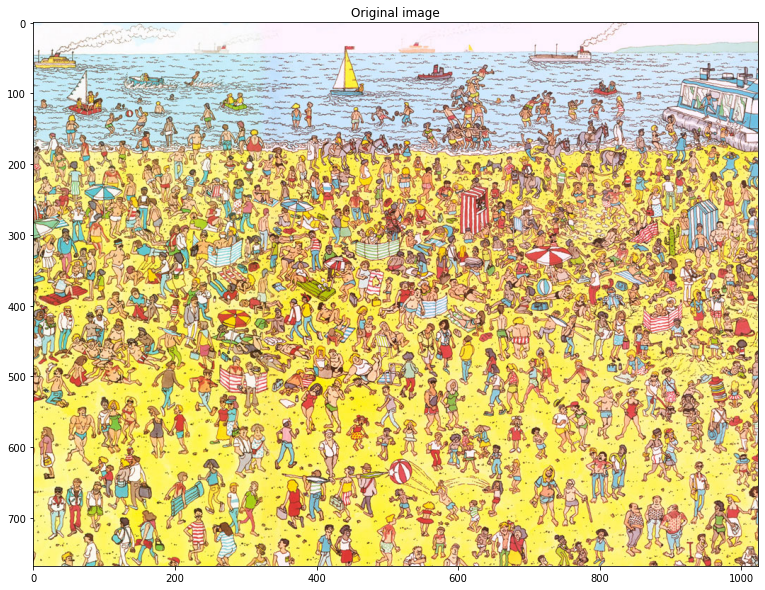

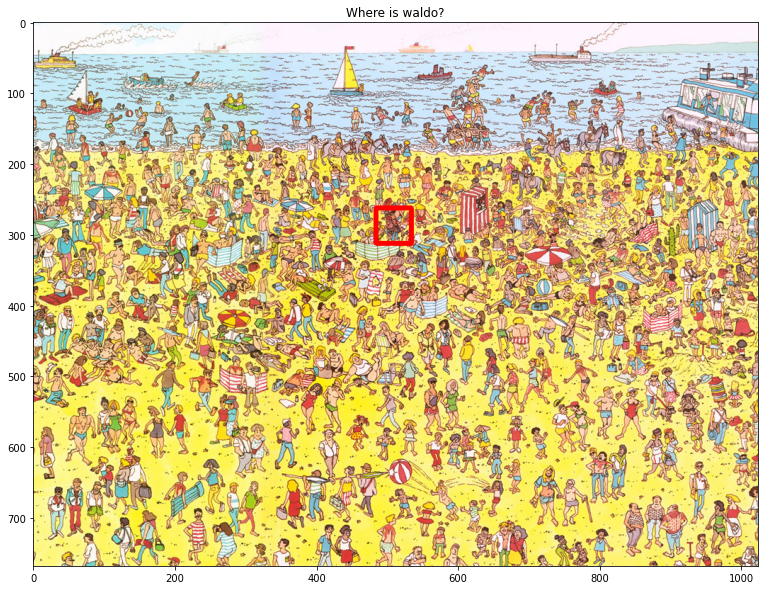

In [9]:
# load image and convert it to grayscale
image = cv2.imread("/content/images/WaldoBeach.jpg")
imshow("Original image", image)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# load template image
template = cv2.imread("/content/images/waldo.jpg", 0)

result = cv2.matchTemplate(gray, template, cv2.TM_CCOEFF)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

# create bouding box
top_left = max_loc
bottom_right = (top_left[0] + 50, top_left[1] + 50)
cv2.rectangle(image, top_left, bottom_right, (0, 0, 255), 5)

imshow("Where is waldo?", image)